# Prediction for Suscription to Term Deposit of Bank Clients

(This notebook was developed by Paula Vergara and uploaded in github.com/paulajve)

## 1. About the dataset

Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt
1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
   The zip file includes two datasets: 
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   ## Input variables:
   ### bank client data:
   1 - age (numeric) <br>
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
   5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
   6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
   7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>
   ### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")<br>
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
   ### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
  14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>
   ### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
  20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

  ## Output variable (desired target):<br>
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

## 2. EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
!pip install category_encoders
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from typing import Tuple
from sklearn.preprocessing import StandardScaler
import time
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTEf
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/Users/paula/MOPC/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.1. Distribution of clients suscribed to term deposit

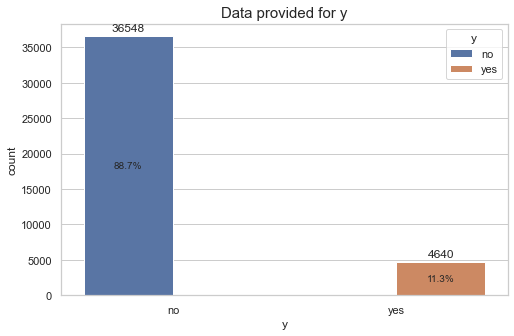

In [4]:
new_df = df.copy()
count_zero = new_df['y'].value_counts()[0]
count_one = new_df['y'].value_counts()[1]

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(new_df))
ax = sns.countplot(x="y", hue="y", data=new_df)

plt.title('Data provided for y', fontsize=15)

for bar in ax.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
      ax.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2,
               bar.get_height()), ha='center', va='center',
               size=12, xytext=(0, 8),
               textcoords='offset points')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()/2
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

The data referenced to 'y' column is imbalanced.
In this stage we have to decide what machine learning model for classification would be the better option to use.

#### Important Note:
If we have that our target class is imbalanced, because if we don't treat the model as an imbalanced one, we could obtain a biased model towards the majority class prediction.
For handling imbalanced models we can apply different techniques such as:

    - Upsampling of the minority class
    - Downsampling of the majority class
    - Combine both previouse techniques
    - Generate syntethic data
    - Balance the class weight

In addition, we need chossing the right metric for a imbalanced dataset, metrics such as:

    - AUC-ROC Score
    - Precision, Recal, and F1-Score
    - Confusion Matrix for visualization of TP, FP, FN and TN

### 2.2. Main categorical variables

#### 2.2.1. Level of job per client

In [5]:
df221 = df.copy()
data221 = df221.groupby('job').count()['age']
data221

job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: age, dtype: int64

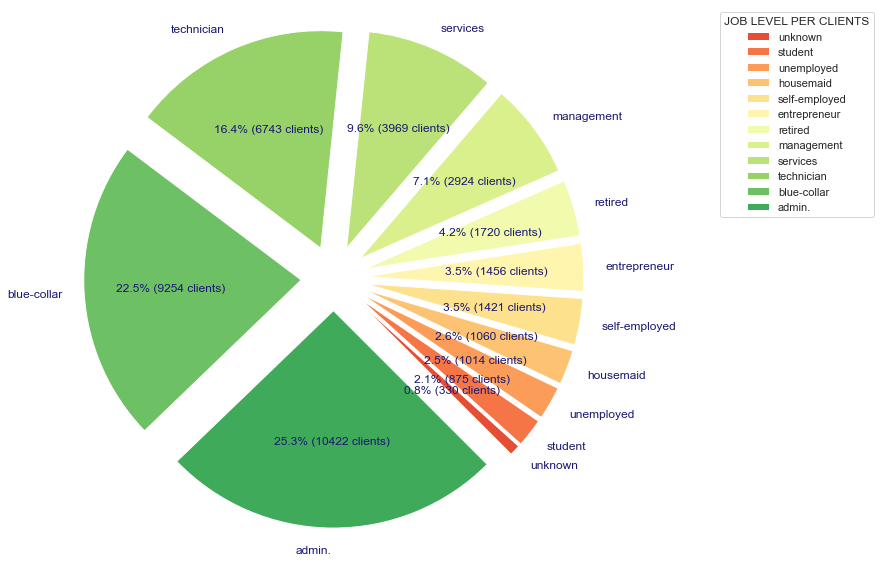

In [6]:
### Level of job plot

"""
We could show the distribution of jobs per client in a horizontal bar chart, but we've chosen the pie chart
plot to show the matplotlib functionality for pie charts.
"""
job_appl = df221['job'].value_counts(ascending=True)
color_list = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, 12))
labels = job_appl.index
explode = (0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15)
plt.rcParams['font.size'] = 10
plt.figure(figsize=(15, 10))
plt.pie(job_appl, explode=explode, labels=labels, colors=color_list, shadow=False, 
autopct= lambda p: "{:.1f}% ({:.0f} clients)".format(p, p*sum(data221)/100),
textprops={'fontsize': 12, 'color':"midnightblue"}, startangle=-45)
plt.legend(title="JOB LEVEL PER CLIENTS", loc='upper left', bbox_to_anchor=(1.2, 1))
plt.show()

#### 2.2.2. Marital status per client

In [7]:
### Marital status per client

df222 = df.copy()
data222 = df222.groupby('marital').count()['age']
data222

marital
divorced     4612
married     24928
single      11568
unknown        80
Name: age, dtype: int64

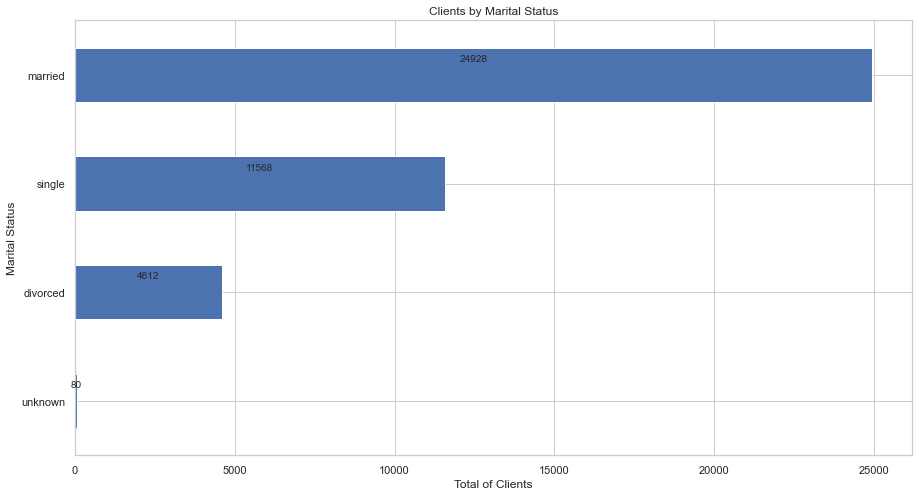

In [8]:
"""
The number of clients by marital status is obtained using 'value_counts()'
method and plotting the result in a horizontal barchart.
"""
marital_appl = df222['marital'].value_counts(ascending=True)
ax = marital_appl.plot(kind = 'barh', figsize = (15,8))
plt.title('Clients by Marital Status')

for barh in ax.patches:
    height = barh.get_height()
    width = barh.get_width()
    x = barh.get_x()
    y = barh.get_y()
    label_text = width
    label_x = x + width / 2
    label_y = y + 0.8*height  
    ax.text(label_x, label_y, label_text, ha='center', va='center')

plt.xlabel('Total of Clients')
plt.ylabel('Marital Status')

plt.show()

#### 2.2.3. Education level per client

In [9]:
### Education level per client

df223 = df.copy()
data223 = df223.groupby('education').count()['age']
data223

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: age, dtype: int64

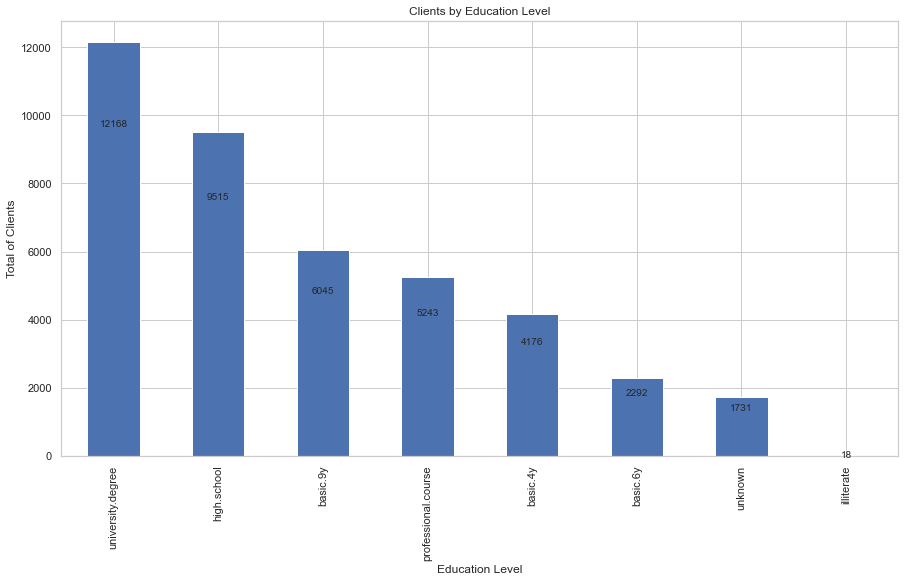

In [10]:
"""
The number of clients by education level is obtained using 'value_counts()'
method and plotting the result in a barchart.
"""
education_appl = df223['education'].value_counts()
ax = education_appl.plot(kind = 'bar', figsize = (15,8))
plt.title('Clients by Education Level')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + 0.8*height  
    ax.text(label_x, label_y, label_text, ha='center', va='center')

plt.xlabel('Education Level')
plt.ylabel('Total of Clients')

plt.show()

#### 2.2.4. Housing ownership vs personal loan per client

In [11]:
### Property ownership per client

df224 = df.copy()
data224 = df224.groupby('housing').count()['age']
data224

housing
no         18622
unknown      990
yes        21576
Name: age, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


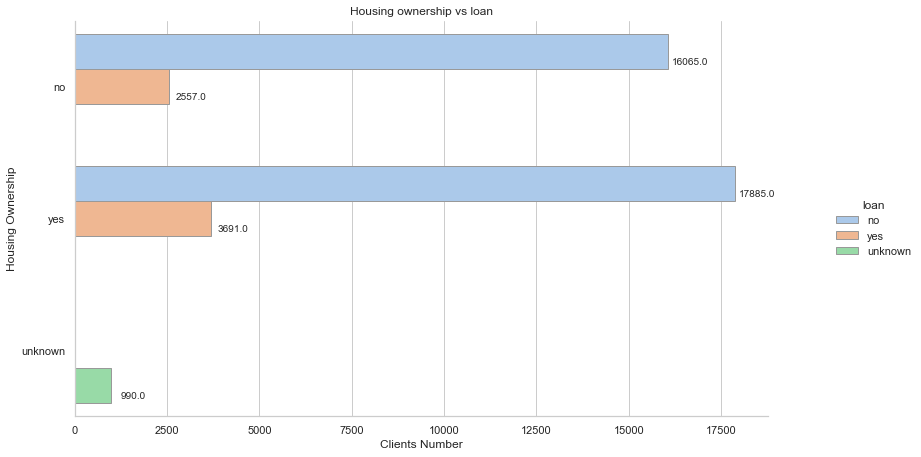

In [12]:
"""
For this chart we'll implement Seaborn barchart with differentiation by color, making 
a correlation between housing owners and loan takers.
"""

g = sns.catplot(y="housing", hue="loan", kind="count",
            palette="pastel", edgecolor=".6",
            data=df224,
            legend=True)


plt.title('Housing ownership vs loan')
plt.xlabel('Clients Number')
plt.ylabel('Housing Ownership')

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes patches
for barh in ax.patches:
    height = barh.get_height()
    width = barh.get_width()
    x = barh.get_x()
    y = barh.get_y()
    label_text = width
    label_x = 600 + width
    label_y = y + 0.8*height
    ax.text(label_x, label_y, label_text, ha='center', va='center')


#### 2.2.5. Age distribution per client

In [13]:
### Age per client

df225 = df.copy()
data225 = df225.groupby('age').count()['job']
data225

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: job, Length: 78, dtype: int64

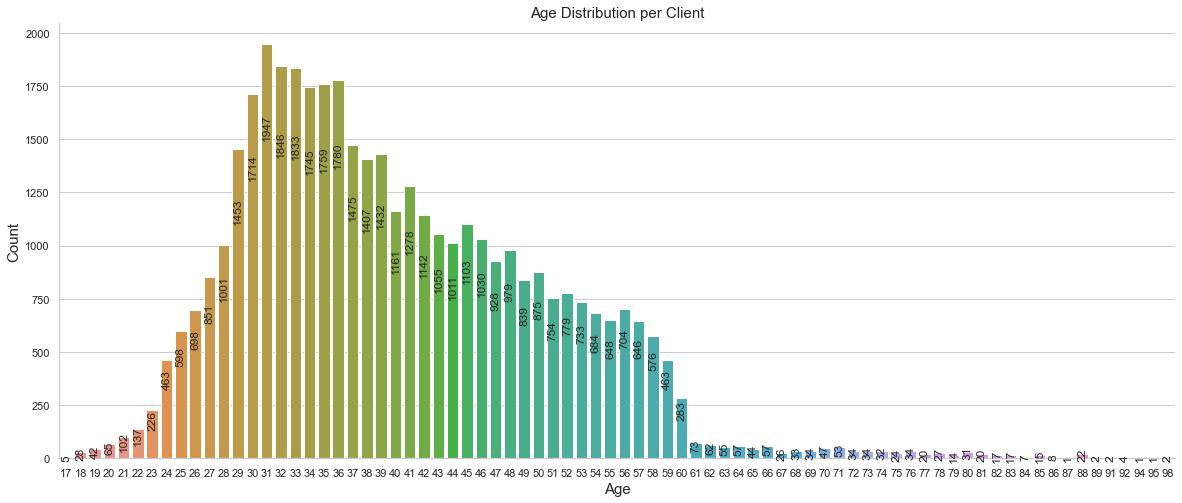

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df225)
ax.set_xlabel('Age', fontsize=15)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + 0.8*height  
    ax.text(label_x, label_y, label_text, rotation=90, fontsize=12, ha='center', va='center')

ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution per Client', fontsize=15)
sns.despine()

### 2.3. Visualizing relationship between all variables

Before to analyze the previous four categorical values in comparison with the output target variable y, we can show a correlation between all variables, using pairplot. This visualization allows finding useful patterns as to find there is a strong correlation 'duration' and 'campaign'.

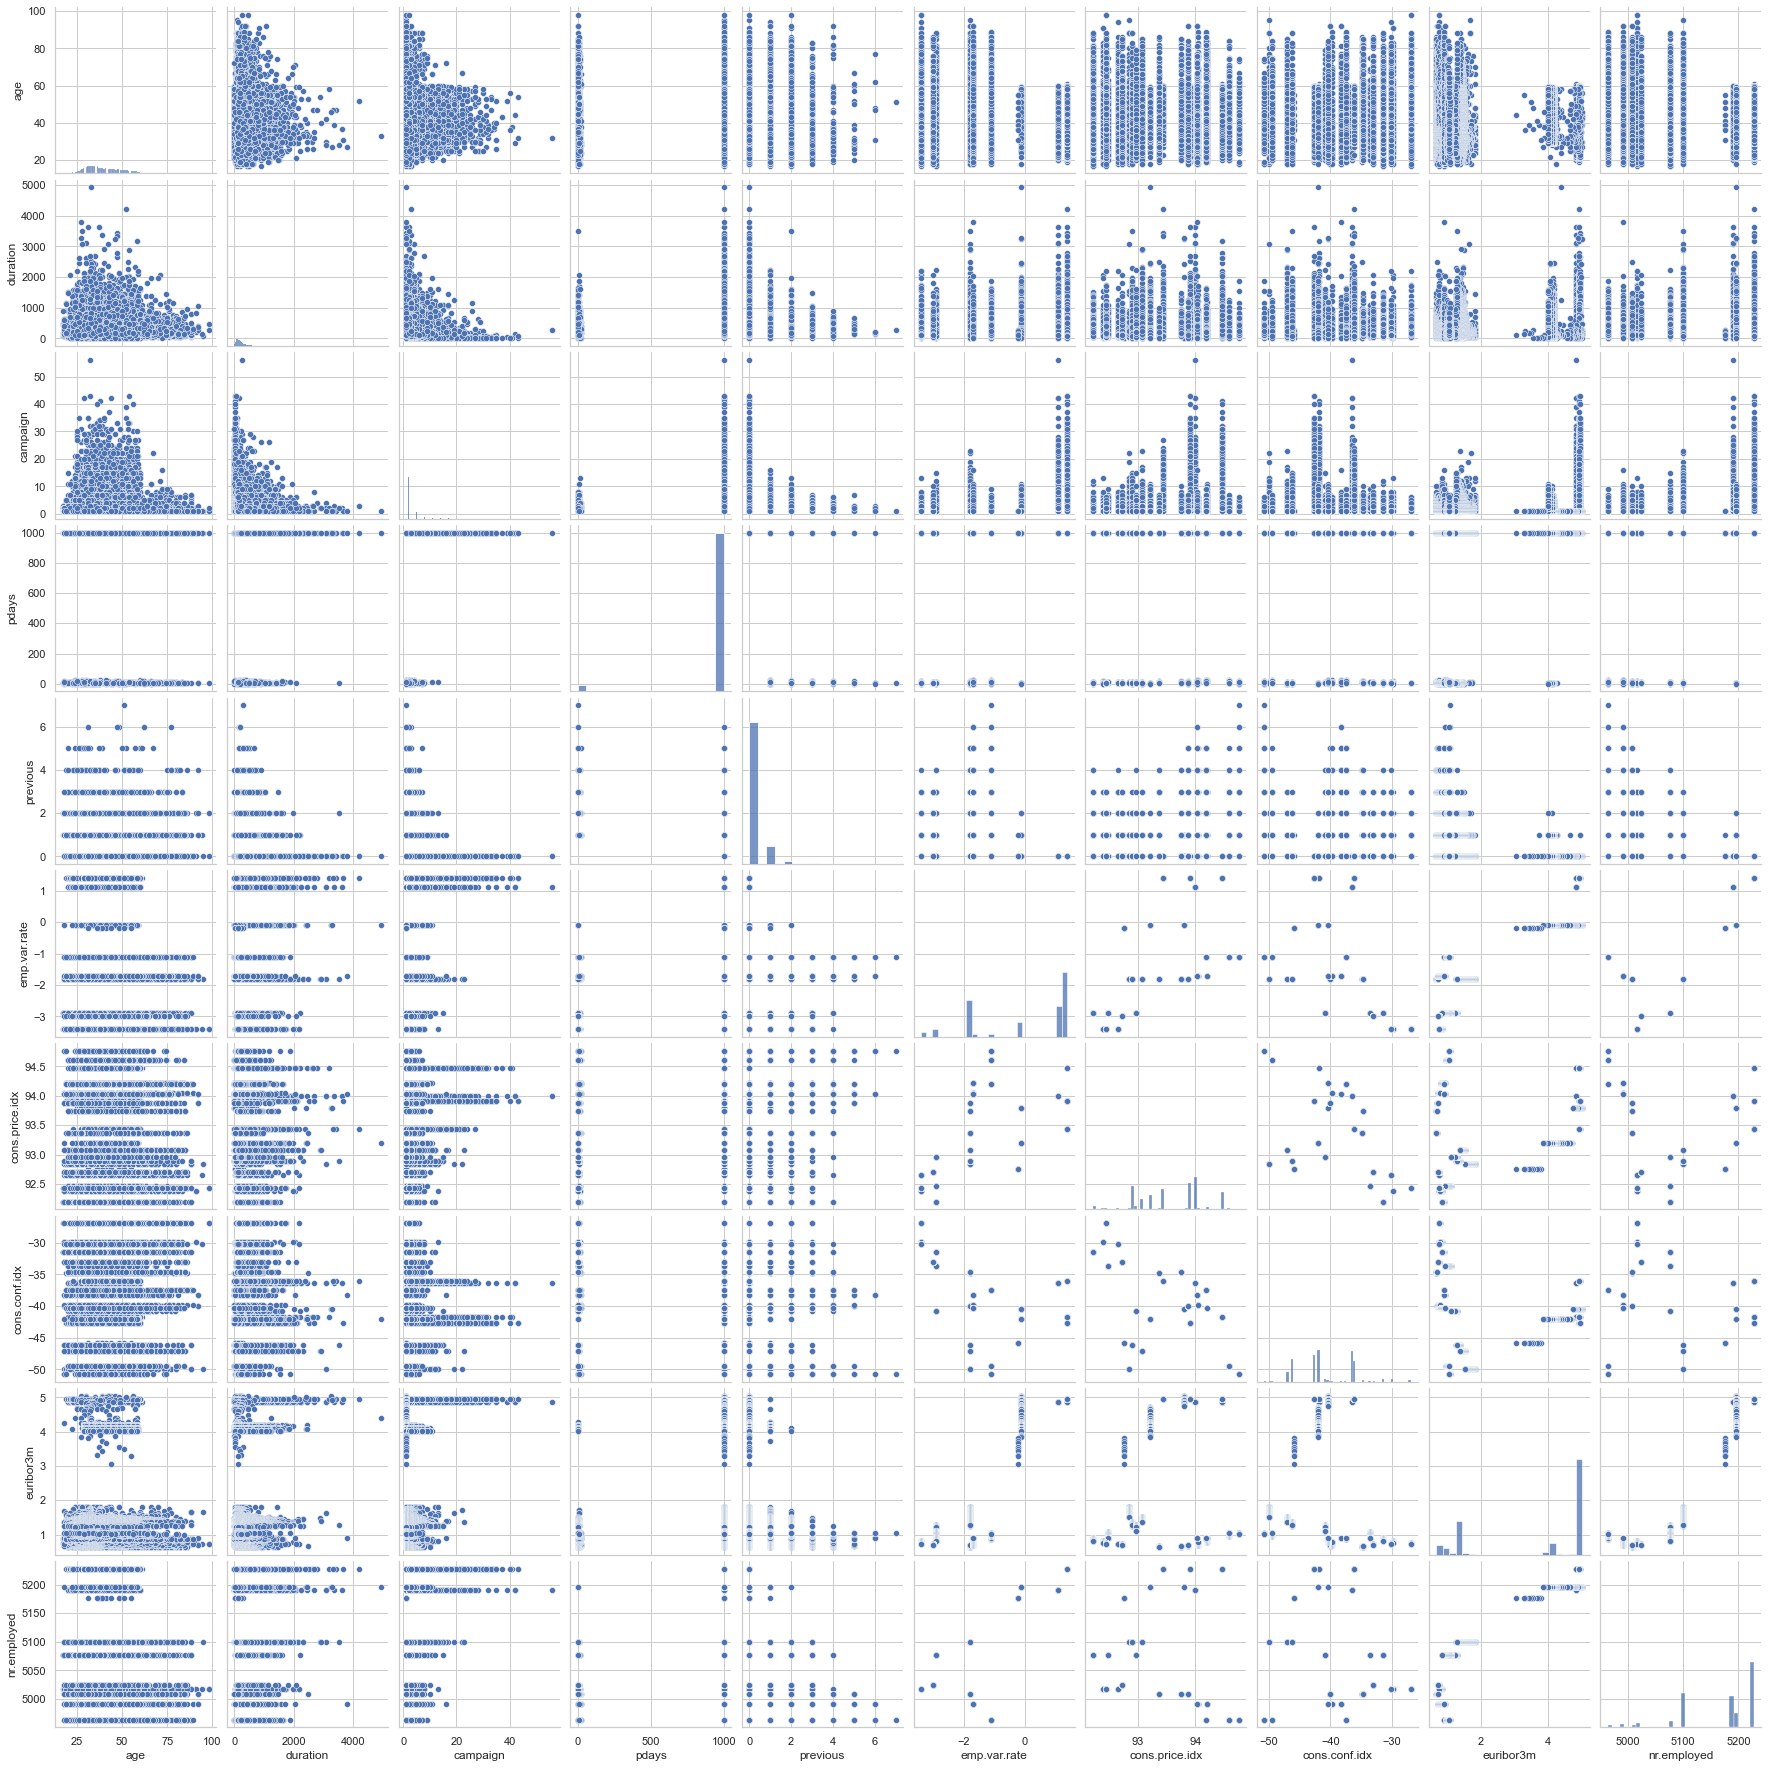

In [15]:
sns.pairplot(df)
plt.show()

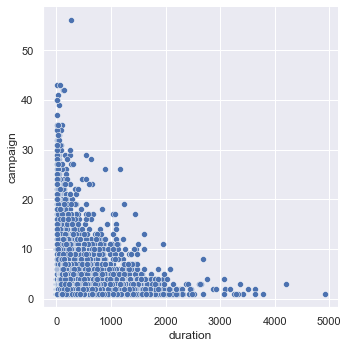

In [16]:
"""
I've imported Seaborn library to show the relationship between 'duration' of calls and 
'campaign' number of calls.
"""

sns.set_theme()
g = sns.relplot(data=df, x='duration', y='campaign')

In this last graph we can see that as number of contacts by campaign increases, the duration of calls in seconds decreases. This pattern could be used to determine the number of effective calls to clients and see the tendence of them to hear the terms of the campaign. And this behaviour of client for no attending calls could be seen in the next chart 'duration' vs 'previous'.

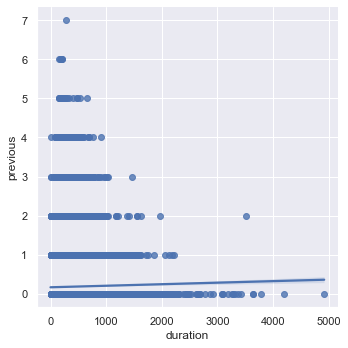

In [17]:
lm = sns.lmplot(data=df, x='duration', y='previous')

In addition, it's interesting analyze the relationship between the 'campaing' number of calls, the 'duration' time of calls and the output variable y. For this, we can plot a new graph as follows:

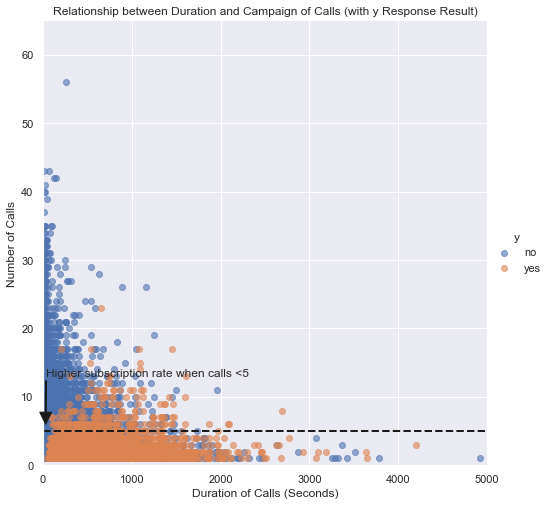

In [18]:
cam_dur_y = sns.lmplot(x='duration', y='campaign', data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height=7)

plt.axis([0, 5000, 0, 65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Seconds)')
plt.title('Relationship between Duration and Campaign of Calls (with y Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5', xytext = (35,13),
             arrowprops=dict(color = 'k', width=1), xy=(30,6))
plt.show()


Another interesting relationship could be done comparising the 'month' and the number of clients that answered yes to a term deposit (target 'y').

In [19]:
### Property ownership per client

df23 = df.copy()
data23 = df23.groupby('month').count()['age']
data23

month
apr     2632
aug     6178
dec      182
jul     7174
jun     5318
mar      546
may    13769
nov     4101
oct      718
sep      570
Name: age, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


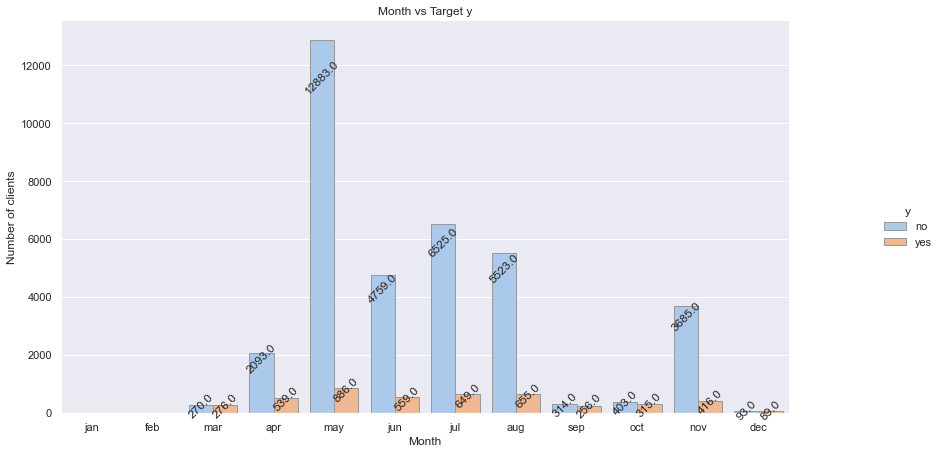

In [20]:
"""
For this chart we'll implement Seaborn barchart with differentiation by color, making 
a correlation between months, campaign and term deposit suscribers.
"""

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plot_order = df23.groupby('month')['month'].count().reindex(months).index.values

g = sns.catplot(x="month", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df23,
            legend=True,
            order=plot_order)

#plt.axis([0, 12, 0, 14000])
plt.title('Month vs Target y')
plt.xlabel('Month')
plt.ylabel('Number of clients')

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes patches
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + 0.9*height
    ax.text(label_x, label_y, label_text, rotation=45, fontsize=12, ha='center', va='center')


At last, we'd like to know the relationship between who have taken a loan and answered yes to a term deposit 'y'.

In [21]:
### Property ownership per client

df23bis = df.copy()
data23bis = df23bis.groupby('loan').count()['age']
data23bis

loan
no         33950
unknown      990
yes         6248
Name: age, dtype: int64

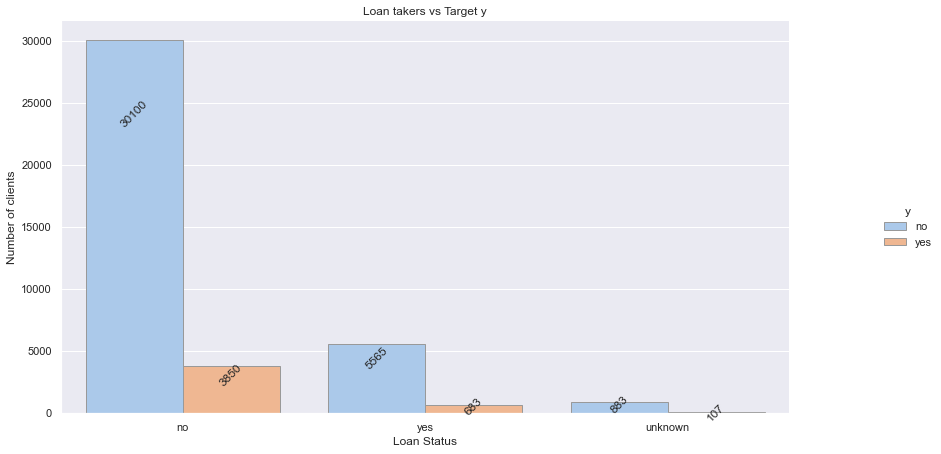

In [22]:
"""
For this chart we'll implement Seaborn barchart with differentiation by color, making 
a correlation between months, campaign and term deposit suscribers.
"""

loan_cat = ['no', 'yes', 'unknown']

plot_order = df23.groupby('loan')['loan'].count().reindex(loan_cat).index.values

g = sns.catplot(x="loan", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df23,
            legend=True,
            order=plot_order)

plt.title('Loan takers vs Target y')
plt.xlabel('Loan Status')
plt.ylabel('Number of clients')

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes patches
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + 0.8*height
    ax.text(label_x, label_y, label_text, rotation=45, fontsize=12, ha='center', va='center')


### 2.3.1. Relationship between job, marital status, education, housing ownership and age vs target output variable y

In [23]:
df231 = df.copy()
data231 = df231.groupby('job').count()['y']
data231

job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: y, dtype: int64

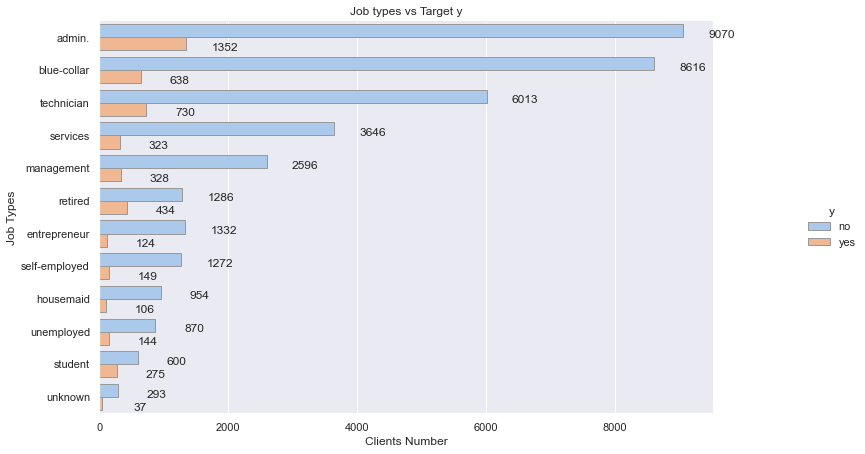

In [24]:
"""
For this chart we'll implement Seaborn barchart with differentiation by color, making 
a correlation between job types and y possible takers.
"""
plot_order = df231.groupby('job')['job'].count().sort_values(ascending=False).index.values

g = sns.catplot(y="job", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df231,
            legend=True,
            order=plot_order)

plt.title('Job types vs Target y')
plt.xlabel('Clients Number')
plt.ylabel('Job Types')

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes patches
for barh in ax.patches:
    height = barh.get_height()
    width = barh.get_width()
    x = barh.get_x()
    y = barh.get_y()
    label_text = width
    label_x = 600 + width
    label_y = y + 0.8*height
    ax.text(label_x, label_y, label_text, ha='center', va='center')

In [25]:
df232 = df.copy()
data232 = df232.groupby('marital').count()['y']
data232

marital
divorced     4612
married     24928
single      11568
unknown        80
Name: y, dtype: int64

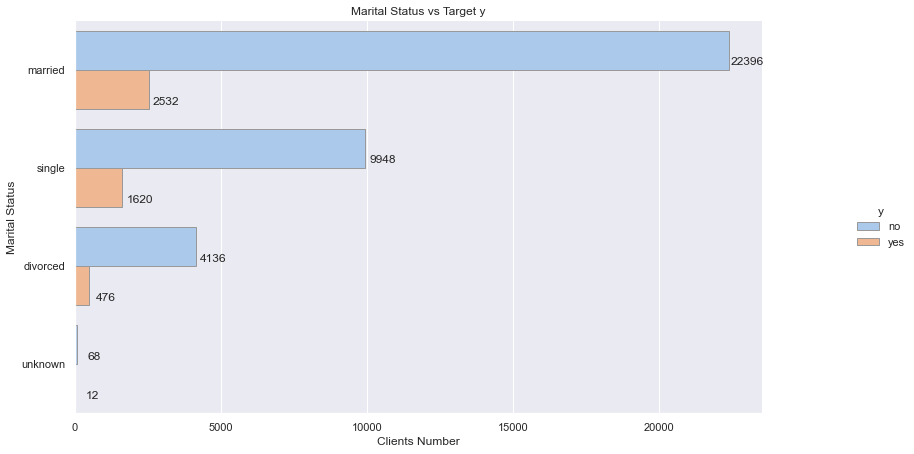

In [26]:
"""
For this chart we'll implement Seaborn barchart with differentiation by color, making 
a correlation between marital status and y possible takers.
"""
plot_order = df232.groupby('marital')['marital'].count().sort_values(ascending=False).index.values

g = sns.catplot(y="marital", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df232,
            legend=True,
            order=plot_order)


plt.title('Marital Status vs Target y')
plt.xlabel('Clients Number')
plt.ylabel('Marital Status')

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes patches
for barh in ax.patches:
    height = barh.get_height()
    width = barh.get_width()
    x = barh.get_x()
    y = barh.get_y()
    label_text = width
    label_x = 600 + width
    label_y = y + 0.8*height
    ax.text(label_x, label_y, label_text, ha='center', va='center')

In [27]:
df233 = df.copy()
data233 = df233.groupby('education').count()['y']
data233

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: y, dtype: int64

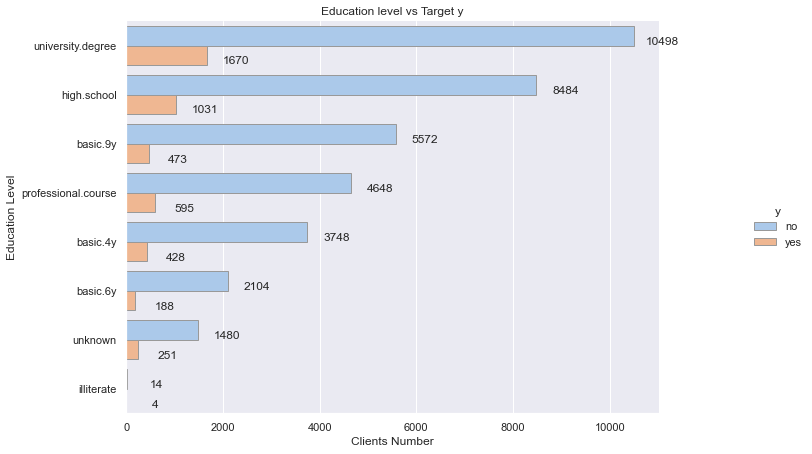

In [28]:
"""
For this chart we'll implement Seaborn barchart with differentiation by color, making 
a correlation between education level and y possible takers.
"""
plot_order = df233.groupby('education')['education'].count().sort_values(ascending=False).index.values

g = sns.catplot(y="education", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df233,
            legend=True,
            order=plot_order)


plt.title('Education level vs Target y')
plt.xlabel('Clients Number')
plt.ylabel('Education Level')

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes patches
for barh in ax.patches:
    height = barh.get_height()
    width = barh.get_width()
    x = barh.get_x()
    y = barh.get_y()
    label_text = width
    label_x = 600 + width
    label_y = y + 0.8*height
    ax.text(label_x, label_y, label_text, ha='center', va='center')

In [29]:
df234 = df.copy()
data234 = df234.groupby('housing').count()['y']
data234

housing
no         18622
unknown      990
yes        21576
Name: y, dtype: int64

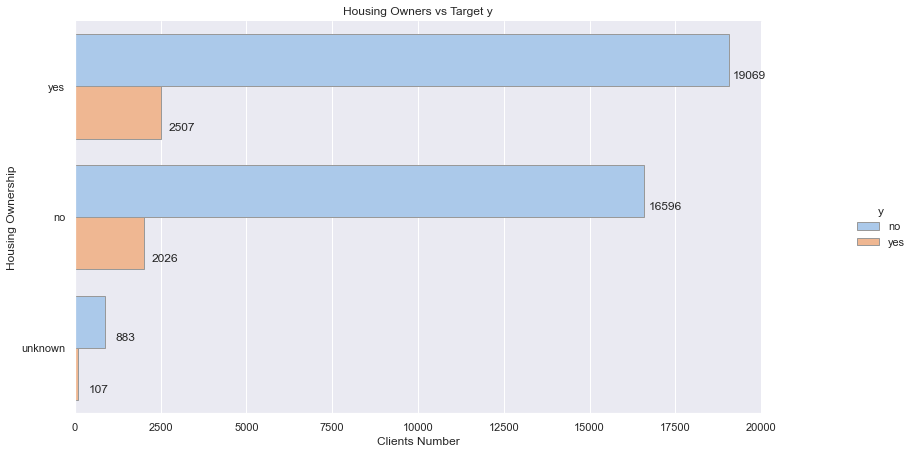

In [30]:
"""
For this chart we'll implement Seaborn barchart with differentiation by color, making 
a correlation between housing ownership and y possible takers.
"""
plot_order = df234.groupby('housing')['housing'].count().sort_values(ascending=False).index.values

g = sns.catplot(y="housing", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df234,
            legend=True,
            order=plot_order)


plt.title('Housing Owners vs Target y')
plt.xlabel('Clients Number')
plt.ylabel('Housing Ownership')

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes patches
for barh in ax.patches:
    height = barh.get_height()
    width = barh.get_width()
    x = barh.get_x()
    y = barh.get_y()
    label_text = width
    label_x = 600 + width
    label_y = y + 0.8*height
    ax.text(label_x, label_y, label_text, ha='center', va='center')

In [31]:
df235 = df.copy()
data235 = df235.groupby('age').count()['y']
data235

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: y, Length: 78, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


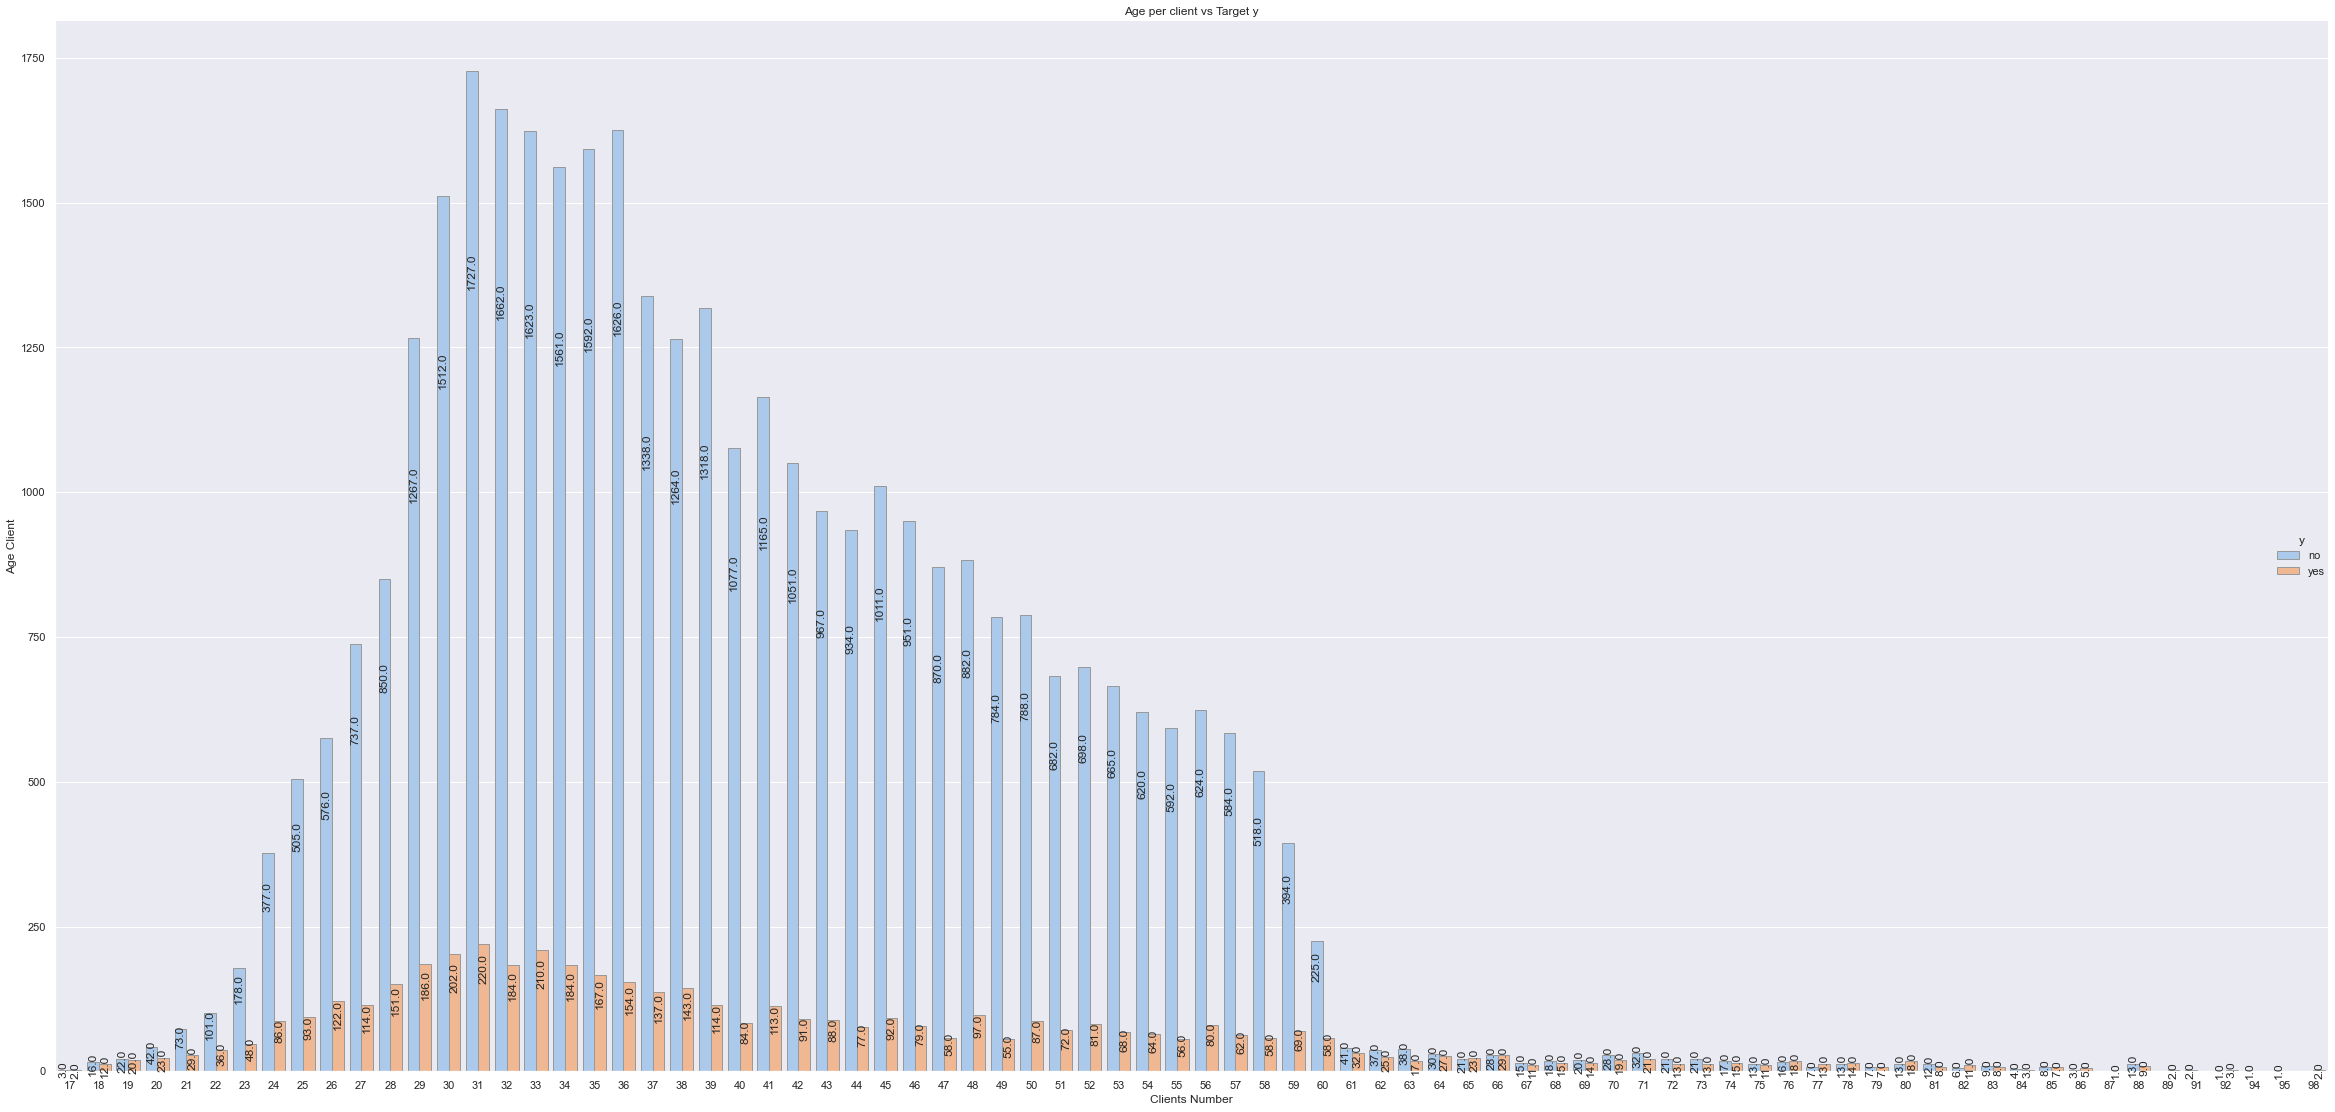

In [32]:
"""
For this chart we'll implement Seaborn barchart with differentiation by color, making 
a correlation between age and y possible takers.
"""
plot_order = df235.groupby('age')['age'].count().index.values

g = sns.catplot(x="age", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df235,
            legend=True,
            order=plot_order)

plt.title('Age per client vs Target y')
plt.xlabel('Clients Number')
plt.ylabel('Age Client')

g.fig.set_size_inches(38, 28)
g.fig.subplots_adjust(top=0.65, right=1)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + 0.8*height  
    ax.text(label_x, label_y, label_text, rotation=90, fontsize=12, ha='center', va='center')

### 2.3.3. Heat Map showing correlation between different numerical variables

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154


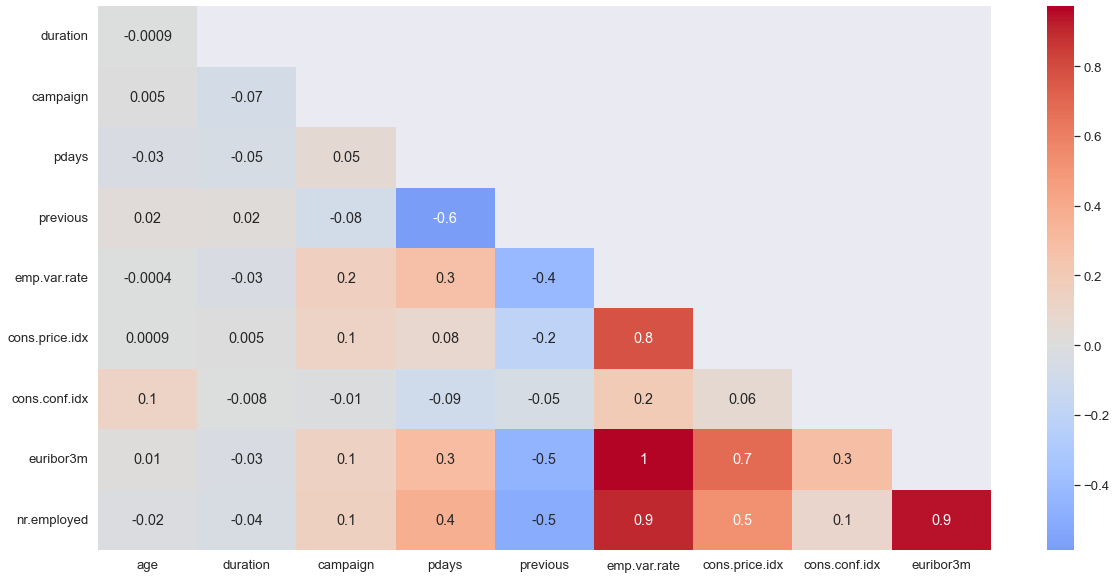

In [33]:
c = df.corr()

# Define mask used to cover squares above diagonal 
mask = np.triu(np.ones_like(c, dtype=np.bool))
# Adjust mask and df
mask = mask[1:, :-1]
corr = c.iloc[1:,:-1].copy()

# Display Correlations
plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(corr, cmap='coolwarm',
            center = 0, 
            annot=True,
            fmt='.1g',
            mask=mask)
corr

## 3. Pre-processing

### 3.1. Handling outliers and categorical/numeric variables

In this section, we'll code a function to make all the data pre processing for the dataset. What we have to deliver is a function that takes `X_train` and `X_test` dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns 
- Impute values for all columns with missing data (using median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

We'll complete the function `preprocess_data(df: pd.DataFrame)` following the instructions given above.

### 3.1.1. Exploring outliers and missing values

The outliers could be seen in 2.3. in the pairplot graphs. Although those values were shown before, we are going to show one graph with all the outliers visualization. 

<AxesSubplot:>

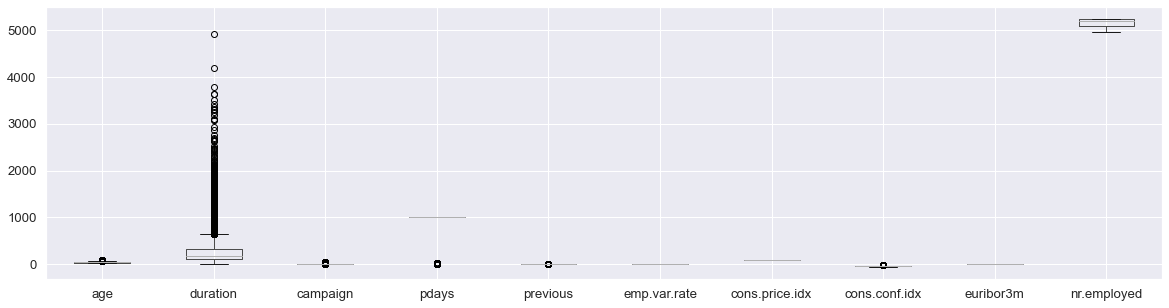

In [34]:
df.boxplot(return_type='axes', figsize=(20,5))

Example of outliers in a boxplot for 'duration'.

<AxesSubplot:>

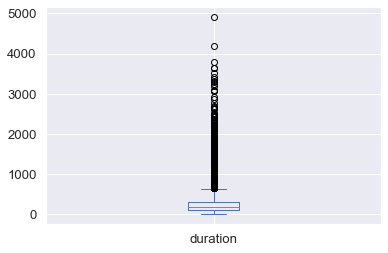

In [35]:
df311 = df.copy()
df311.duration.plot(kind='box')

Example of outliers in a boxplot for 'age'.

<AxesSubplot:>

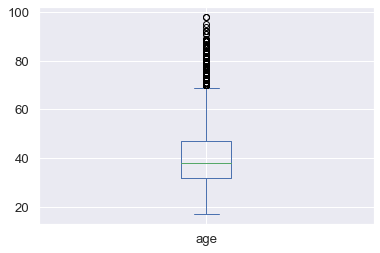

In [36]:
df311b = df.copy()
df311b.age.plot(kind='box')

Counting the NaN values under the entire DataFrame:

In [37]:
counts = df.isna().sum()
print(counts.sort_values())

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64


There'is no NAN values in this dataset. Besides that, we'll include the treatment on NAN in our preprocess_data function.

### 3.1.2. Making function for handling of outliers and preprocessing data

In [38]:
def handling_outliers_IQR(df):
    """
    This function applies the IQR Method to find the outliers
    in all numerical columns and replacing those ones by the median
    value corresponding to no-outliers. The application is done column
    by column in all the dataframe. 
    """
    for col in df.columns:
        if df[col].dtype != object:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            S = 1.5*IQR
            LB = Q1 - S
            UB = Q3 + S
            df.loc[df[col] > UB,col] = df.loc[df[col] < UB,col].median()
            df.loc[df[col] < LB,col] = df.loc[df[col] > LB,col].median()
        else:
            break
    return df

In [39]:
def encoding_function(df):
    """
    For columns with categorical values <= 2 we apply
    LabelEncoder from Sklearn library.
    For columns with categorical values >=3 we apply
    OneHotEncoder from category_encoders library.
    """
    for col_name in df.columns:
        if col_name in df.columns[(df.nunique() <= 2)]:
            le = LabelEncoder()
            le.fit(df[col_name])
            df[col_name] = le.transform(df[col_name])
        else:                  
            encoder = ce.OneHotEncoder(cols=[col_name])
            dfbin = encoder.fit_transform(df[col_name])
            df = pd.concat([df, dfbin], axis=1)
            df.drop(col_name, axis=1, inplace=True)
    return df

In [40]:
def preprocess_data(new_df: pd.DataFrame) -> Tuple[np.ndarray]:
        """
        Pre processes data for modeling. Receives train and testing dataframes 
        and returns numpy ndarrays of cleaned up dataframes with feature engineering 
        already performed.

        Arguments:
          new_df: pd.DataFrame
          
        Returns:
          new_data: np.ndarrary
          
        """
        
        new_df = df.copy()
        

        """
        Data arrangement into numerical and categorical dataframes
        """
        ndf_num = new_df.select_dtypes(exclude='object')
        ndf_cat = new_df.select_dtypes(include='object')

        """
        The handling of Outliers was performed using function 'handling_outliers_IQR'. 
        For this example, we have handled all the outliers from numerical columns 
        with IQR method and replacing by median values. 
        """
      
        handling_outliers_IQR(ndf_num)
        ndf_num

        """
        Filling NAN values in numerical columns using median values
        """
       
        for i in ndf_num.columns:
            ndf_num[i] = ndf_num[i].fillna(ndf_num[i].median())
        ndf_num

        """
        Scaling numerical variables. We're going to scale numerical dataset. 
        Then, we'll merge them with the encoded categorical features dataset 
        at the end of this function.
        """
        scaler = StandardScaler()
        scaled_ndf_num = scaler.fit_transform(ndf_num)
        scaled_ndf_num = pd.DataFrame(scaled_ndf_num, columns=ndf_num.columns)

        """
        Handling of NAN for categorical features
        """
        
        cat_feat = ndf_cat.copy()
        missing_values = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        cat_feat = missing_values.fit_transform(cat_feat)
        imp_feat = pd.DataFrame(cat_feat, columns=ndf_cat.columns)


        """
        Obtaining LabelEncoder for columns with <= 2 categories and One Hot
        Encoding for columns with > 2 categories. We use the function 
        'encoding_function'.
        """

        imp_feat = encoding_function(imp_feat)

        """
        Merging all categorical and numerical datasets in one.
        """
        
        merged_df = imp_feat.join(scaled_ndf_num)
        #merged_df_np = merged_df.to_numpy()

        return merged_df

In the following cell we are going to execute the functions we've just coded. No need to modify this.

In [41]:
new_df = preprocess_data(df)
time.process_time()

62.3125

In [42]:
new_df

,contact,y,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,marital_1,marital_2,marital_3,marital_4,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,default_1,default_2,default_3,housing_1,housing_2,housing_3,loan_1,loan_2,loan_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,poutcome_1,poutcome_2,poutcome_3,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.706581,0.443217,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.810519,-0.379278,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,-0.268244,0.186187,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.043571,-0.364591,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.706581,0.781027,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,-0.164305,0.979307,-0.838424,0.0,0.0,-0.752343,2.058168,-2.300969,-1.495186,-2.815697
41184,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.667200,1.339149,-0.838424,0.0,0.0,-0.752343,2.058168,-2.300969,-1.495186,-2.815697
41185,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1.706581,-0.085530,-0.033496,0.0,0.0,-0.752343,2.058168,-2.300969,-1.495186,-2.815697
41186,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.459323,1.772427,-0.838424,0.0,0.0,-0.752343,2.058168,-2.300969,-1.495186,-2.815697


We're going to check the column for 'duration' and 'age' values after outliers handling and scaling function.

<AxesSubplot:>

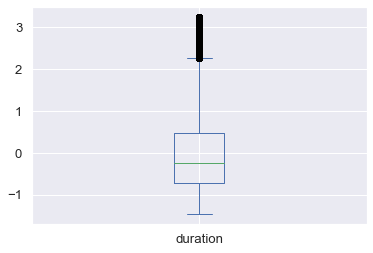

In [43]:
df312b = new_df.copy()
df312b.duration.plot(kind='box')

Our boxplot for 'duration' values is more centered and presents fewer outliers than before preprocessing.

<AxesSubplot:>

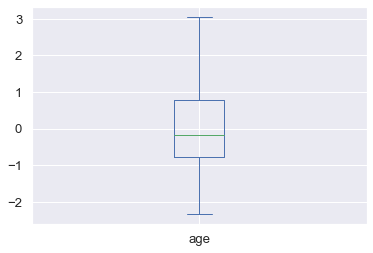

In [44]:
df312b = new_df.copy()
df312b.age.plot(kind='box')

Our boxplot for age is centered and scaled.

### 3.2. Train and test datasets

This step will be separate our train and test datasets columns between Features and Targets. For split the dataset we will use train_test_split from sklearn.

- Assign to `X_train` those columns from `new_df` that should be used as features for training our models.
- Assign to `y_train` the single column from `new_df` that should be used as our target (i.e. what we want to predict).
- Assign to `X_test` those columns from `new_df` that should be used as features for training our models.
- Assign to `y_test` the single column from `new_df` that should be used as our target (i.e. what we want to predict).

In [45]:
y = new_df[['y']]
X = new_df.drop(['y'], axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
X_test.columns

Index(['contact', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6',
       'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'job_12', 'marital_1',
       'marital_2', 'marital_3', 'marital_4', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'education_7', 'education_8', 'default_1', 'default_2', 'default_3',
       'housing_1', 'housing_2', 'housing_3', 'loan_1', 'loan_2', 'loan_3',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'poutcome_1', 'poutcome_2', 'poutcome_3', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [48]:
y_test.columns

Index(['y'], dtype='object')

## 4. Training Models

As we have mentioned in 2.1., we need balancing the dataset and using the right metrics.
We have a binary classification model, so we'll use 2 different approachs:

    - Use of the following models that can handle metrics such as confusion matrix, precision, recall, F1-Score and ROC AUC (see function 'scores()' below):
        - Logistic Regression, 
        - Random Forest Classifier, 
        - SVM Classifier.
    - Use of over-sampling applying under_sampling SMOTE from sklearn.

We'll check the calibration of the classifier, speacially the SVM classifier as we'll explain in section 5.
At the end, we'll compare all the results to find the best model with the best prediction for this binary classification model.        

In [49]:
def scores (clf, y_true, y_pred):
        # accuracy: (tp + tn) / (p + n)
        accuracy = accuracy_score(y_true, y_pred)
        print('Accuracy: %f' % accuracy)
        # precision tp / (tp + fp)
        precision = precision_score(y_true, y_pred)
        print('Precision: %f' % precision)
        # recall: tp / (tp + fn)
        recall = recall_score(y_true, y_pred)
        print('Recall: %f' % recall)
        # f1: 2 tp / (2 tp + fp + fn)
        f1 = f1_score(y_true, y_pred)
        print('F1 score: %f' % f1)
        # confusion matrix
        confusion_matrix(y_true, y_pred)
        plot_confusion_matrix(clf, X_test, y_test)
        plt.show()
        return accuracy, precision, recall, f1, plot_confusion_matrix

### 4.1. Baseline: Logistic Regression

4.1.1. We'll import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. 

Assign the trained model to log_reg variable.

In [50]:
log_reg = LogisticRegression(max_iter = 10000, C = 0.01).fit(X_train, y_train)

time.process_time()

63.59375

In [51]:
lr_predict = log_reg.predict(X_test)
lr_predict

array([0, 0, 0, ..., 0, 0, 0])

4.1.2. Use the trained model to predict probabilities for the test data.

Important note: When using the function predict_proba() for getting model probabilities we will get, for each sample, a tuple indicating the probability for class 0 and for class 1 respectively. For computing the AUC ROC score we only need the probability that the client takes the suscription to term deposit (equivalent to class 1).

In [52]:
lr_predict_proba = log_reg.predict_proba(X_test)
lr_predict_proba

array([[0.87167358, 0.12832642],
       [0.96781035, 0.03218965],
       [0.96116723, 0.03883277],
       ...,
       [0.95909432, 0.04090568],
       [0.9738287 , 0.0261713 ],
       [0.93975755, 0.06024245]])

4.1.3. Get AUC ROC score on test dataset. See [scikit-learn AUC ROC function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for a working implementation.

Assign the AUC ROC score to `lr_roc_auc` variable.


In [53]:
### Assign to `lr_roc_auc` variable.
lr_roc_auc = roc_auc_score(y_test, lr_predict_proba[: , 1])
lr_roc_auc

0.8134688174617803

Using the trained model to predict probabilities on the test set.

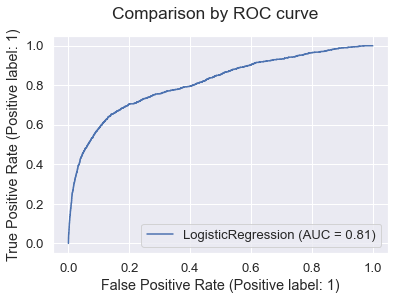

In [54]:
lr_plot = plot_roc_curve(log_reg, X_test, y_test)
lr_plot.figure_.suptitle("Comparison by ROC curve")
plt.show()

Accuracy: 0.904831
Precision: 0.713427
Recall: 0.256299
F1 score: 0.377119


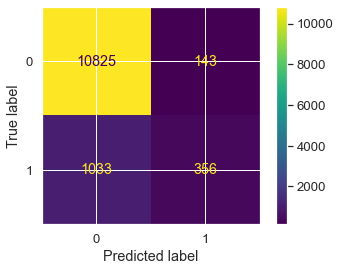

(0.9048312697256615,
 0.7134268537074149,
 0.25629949604031677,
 0.3771186440677966,
 <function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>)

In [55]:
scores(log_reg, y_test, lr_predict)

### 4.2. Random Forest Classifier

4.2.1. Train a RandomForestClassifier, print the time taken by the fit function. We'll use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

Assign the trained model to `rf` variable.

In [56]:
### Assgign to `rf`
rf = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
time.process_time()

75.0625

In [57]:
rf_predict = rf.predict(X_test)
rf_predict

array([0, 0, 0, ..., 0, 0, 0])

Using the classifier to predict probabilities on the test set.

In [58]:
rf_predict_proba = rf.predict_proba(X_test)
rf_predict_proba

array([[0.94, 0.06],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.96, 0.04],
       [0.98, 0.02],
       [0.98, 0.02]])

4.2.2. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_roc_auc` variable.


In [59]:
### Assign to `rf_roc_auc` variable.
rf_roc_auc = roc_auc_score(y_test, rf_predict_proba[: , 1])
rf_roc_auc

0.9284889375151957

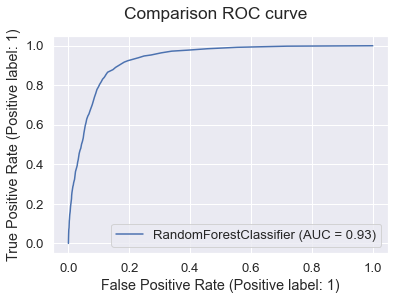

In [60]:
rf_plot = plot_roc_curve(rf, X_test, y_test)
rf_plot.figure_.suptitle("Comparison ROC curve")
plt.show()

Accuracy: 0.907826
Precision: 0.664474
Recall: 0.363571
F1 score: 0.469986


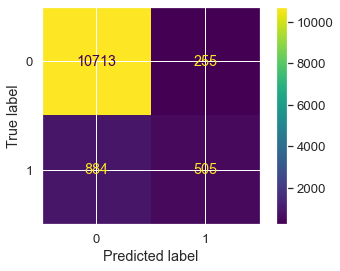

(0.907825523994497,
 0.6644736842105263,
 0.36357091432685384,
 0.4699860400186134,
 <function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>)

In [61]:
scores(rf, y_test, rf_predict)

### 4.3. SVM Classifier (Support Vector Machine)

In [62]:
### Assgign to `svm_model`
svm_model = SVC(kernel='linear', C=0.001, probability=True, class_weight='balanced').fit(X_train, y_train)
time.process_time()

498.609375

In [63]:
svm_predict = svm_model.predict(X_test)

Using the classifier to predict probabilities on the test set.

In [64]:
svm_predict_proba = svm_model.predict_proba(X_test)
svm_predict_proba

array([[0.82356299, 0.17643701],
       [0.96882044, 0.03117956],
       [0.92116225, 0.07883775],
       ...,
       [0.96333353, 0.03666647],
       [0.97446566, 0.02553434],
       [0.95627624, 0.04372376]])

In [65]:
### Assign to `svm_roc_auc` variable.
svm_roc_auc = roc_auc_score(y_test, svm_predict_proba[: , 1])
svm_roc_auc

0.8047559915119263

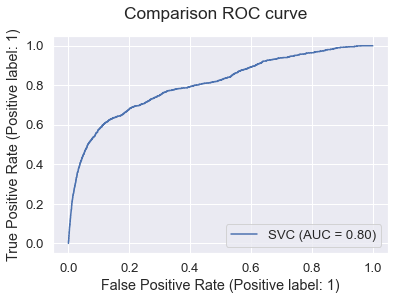

In [66]:
svm_plot = plot_roc_curve(svm_model, X_test, y_test)
svm_plot.figure_.suptitle("Comparison ROC curve")
plt.show()

Accuracy: 0.773651
Precision: 0.288715
Recall: 0.692585
F1 score: 0.407541


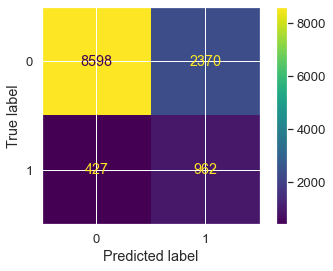

(0.7736505624342478,
 0.2887154861944778,
 0.6925845932325414,
 0.4075407752594789,
 <function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>)

In [67]:
scores(svm_model, y_test, svm_predict)

### 4.4. Sampling strategy in imbalanced-learn - SMOTE

In [68]:
smote = SMOTE(sampling_strategy= 'auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [69]:
#Creating a new Oversampling Data Frame

resampled_df = X_resampled.join(y_resampled)
resampled_df

,contact,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,marital_1,marital_2,marital_3,marital_4,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,default_1,default_2,default_3,housing_1,housing_2,housing_3,loan_1,loan_2,loan_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,poutcome_1,poutcome_2,poutcome_3,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.706581,0.443217,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.810519,-0.379278,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,-0.268244,0.186187,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.043571,-0.364591,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.706581,0.781027,-0.838424,0.0,0.0,0.648092,0.722722,0.968067,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,-0.531010,0.004327,-0.838424,0.0,0.0,-2.216433,-1.977538,-0.257821,-1.661236,-2.069683,1
73092,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.719101,3.150515,-0.033496,0.0,0.0,0.839061,0.591424,-0.462136,0.773254,0.845170,1
73093,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1.203687,-0.247092,-0.033496,0.0,0.0,0.839061,0.591424,-0.462136,0.774575,0.845170,1
73094,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.164305,-0.265287,-0.726454,0.0,0.0,-1.135951,0.596488,0.229756,-1.671431,-2.278313,1


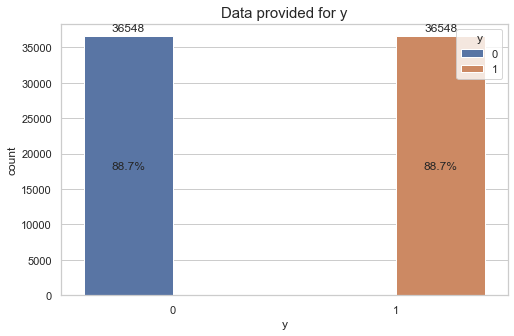

In [70]:
resampled_data = resampled_df.copy()
count_zero = resampled_data['y'].value_counts()[0]
count_one = resampled_data['y'].value_counts()[1]

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(new_df))
ax = sns.countplot(x="y", hue="y", data=resampled_data)

plt.title('Data provided for y', fontsize=15)

for bar in ax.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
      ax.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2,
               bar.get_height()), ha='center', va='center',
               size=12, xytext=(0, 8),
               textcoords='offset points')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()/2
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

In [71]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#### 4.4.1. Resample with Logistic Regression

In [72]:
log_reg_res = LogisticRegression(max_iter = 10000, C = 0.01).fit(X_train_r, y_train_r)
time.process_time()

543.34375

In [73]:
log_reg_res_predict = log_reg_res.predict(X_test_r)
log_reg_res_predict

array([1, 0, 1, ..., 1, 1, 0])

In [74]:
lr_predict_proba_res = log_reg_res.predict_proba(X_test_r)
lr_predict_proba_res

array([[0.04761731, 0.95238269],
       [0.88322141, 0.11677859],
       [0.17573894, 0.82426106],
       ...,
       [0.0278263 , 0.9721737 ],
       [0.47233699, 0.52766301],
       [0.63078531, 0.36921469]])

In [75]:
lr_roc_auc_res = roc_auc_score(y_test_r, lr_predict_proba_res[: , 1])
lr_roc_auc_res

0.9598340839380787

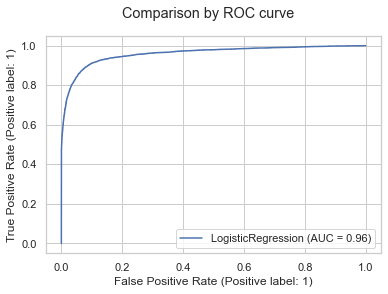

In [76]:
lr_plot_res = plot_roc_curve(log_reg_res, X_test_r, y_test_r)
lr_plot_res.figure_.suptitle("Comparison by ROC curve")
plt.show()

Accuracy: 0.902868
Precision: 0.930994
Recall: 0.869462
F1 score: 0.899176


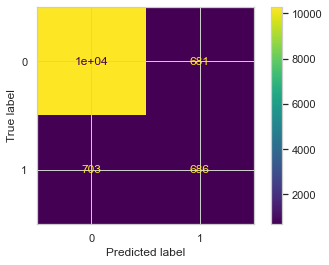

(0.9028683478498791,
 0.9309939227602431,
 0.8694617356279751,
 0.8991763703493326,
 <function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>)

In [77]:
scores(log_reg_res, y_test_r, log_reg_res_predict)

#### 4.4.2. Resample with Random Forest

In [78]:
rf_res = RandomForestClassifier(n_jobs=-1).fit(X_train_r, y_train_r)
time.process_time()

569.765625

In [79]:
rf_res_predict = rf_res.predict(X_test_r)

In [80]:
rf_predict_proba_res = rf_res.predict_proba(X_test_r)
rf_predict_proba_res

array([[0.06, 0.94],
       [0.9 , 0.1 ],
       [0.01, 0.99],
       ...,
       [0.09, 0.91],
       [0.5 , 0.5 ],
       [0.78, 0.22]])

In [81]:
rf_roc_auc_res = roc_auc_score(y_test_r, rf_predict_proba_res[: , 1])
rf_roc_auc_res

0.9928277790911257

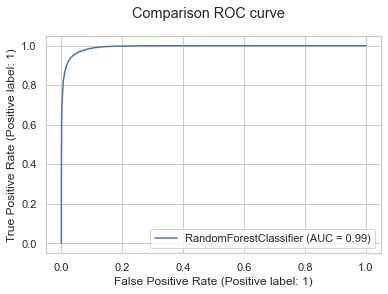

In [82]:
rf_plot_res = plot_roc_curve(rf_res, X_test_r, y_test_r)
rf_plot_res.figure_.suptitle("Comparison ROC curve")
plt.show()

Accuracy: 0.955082
Precision: 0.942796
Recall: 0.968601
F1 score: 0.955524


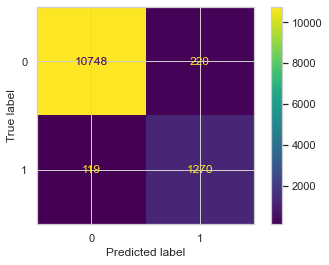

(0.9550823110948972,
 0.9427960438385459,
 0.9686012449652142,
 0.9555244502641441,
 <function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>)

In [83]:
scores(rf_res, y_test_r, rf_res_predict)

#### 4.4.3. Resample with SVM

In [84]:
svm_model_res = SVC(kernel='linear', C=0.001, probability=True, class_weight='balanced').fit(X_train_r, y_train_r)
time.process_time()

1880.75

In [85]:
svm_model_res_predict = svm_model_res.predict(X_test_r)

In [86]:
svm_predict_proba_res = svm_model_res.predict_proba(X_test_r)
svm_predict_proba_res

array([[0.07728447, 0.92271553],
       [0.87986539, 0.12013461],
       [0.27910656, 0.72089344],
       ...,
       [0.00751254, 0.99248746],
       [0.26510721, 0.73489279],
       [0.38538009, 0.61461991]])

In [87]:
svm_roc_auc_res = roc_auc_score(y_test_r, svm_predict_proba_res[: , 1])
svm_roc_auc_res

0.9384977801275709

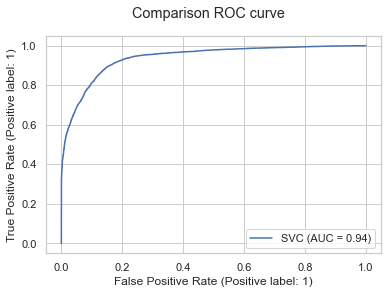

In [88]:
svm_plot_res = plot_roc_curve(svm_model_res, X_test_r, y_test_r)
svm_plot_res.figure_.suptitle("Comparison ROC curve")
plt.show()

Accuracy: 0.851612
Precision: 0.894710
Recall: 0.795771
F1 score: 0.842345


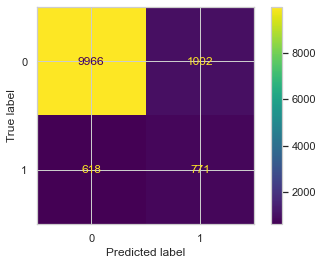

(0.851612020611975,
 0.894709757101688,
 0.7957707799340901,
 0.8423449612403101,
 <function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>)

In [89]:
scores(svm_model_res, y_test_r, svm_model_res_predict)

## 5. Classifier Calibration

Classifiers such as logistic regression and Naive Bayes predict class probabilities as the outcome instead of the predicting the labels themselves. A new data point is classified as positive if the predicted probability of positive class is greater than a threshold. Each threshold leads to a different classifier. Hence, typical metrics such as accuracy and F1 score depend on the threshold one picks. AUC for such classifiers gives an aggregated metric across thresholds.

Some classifiers such as an SVM or a perceptron give the class labels directly as the  outcome and not class probabilities. For that computing the AUC  metric for classifiers such as the SVM which give class labels as outcome makes sense, we need to get the class probability outcomes instead of absolute class values.

For those cases we need to transform the outcome of a classification model into a probability distribution over classes.

In order to check if a model is calibrated or not, we need to see the accuracy for each model. In addition, we need to place all predictions in group bins, using calibration_curve from sklearn, to get the fraction of positives per bin and the average confidence per bin, which is just the average of the probability estimates of the samples that belong to that bin. Plotting the average vs fraction of positives per bin we get the realiability plot.  

### 5.1. Calibration curve function (Reliability Diagram)

A Reliability Diagram helps us conduct a qualitative assessment of the presence of mis-calibration and the nature of it (under-confident or over-confident).

In practice, reliability diagram is a plot of the observed frequency of the class of interest as a function of the predicted probability.

We can construct our reliability diagram:

 - Choosing the number of bins; 
 - Bucketing the data points and predicted probabilities into the corresponding bins (transforming the numeric features into categorical features using a set of thresholds, called also 'binning'). The size of each bin can be detremined using uniform assignment of data point for each bin or splitting into quantiles; 
 - Computing the average probability and the average frequency in the right bin; 
 - And plotting the average observe frequency ad a function of the average predicted probabilities.

In our case we'll select 10 bins.

In [90]:
def plot_calibration_curve(name, fig_index, y_test, probs):
    """Plot calibration curve for est w/o and with calibration. """

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    
    frac_of_pos, mean_pred_value = calibration_curve(y_test, probs, n_bins=10)

    ax1.plot(mean_pred_value, frac_of_pos, "s-", label=f'{name}')
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title(f'Calibration plot ({name})')
    
    ax2.hist(probs, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")

We'll plot the calibration plot on the imbalanced models first.

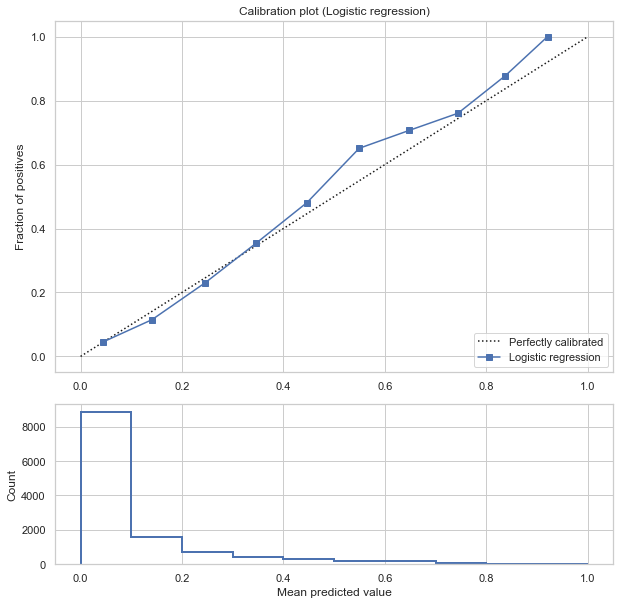

In [91]:
# Plot calibration curve for logistic regression
plot_calibration_curve("Logistic regression", 1, y_test, lr_predict_proba[:,1])

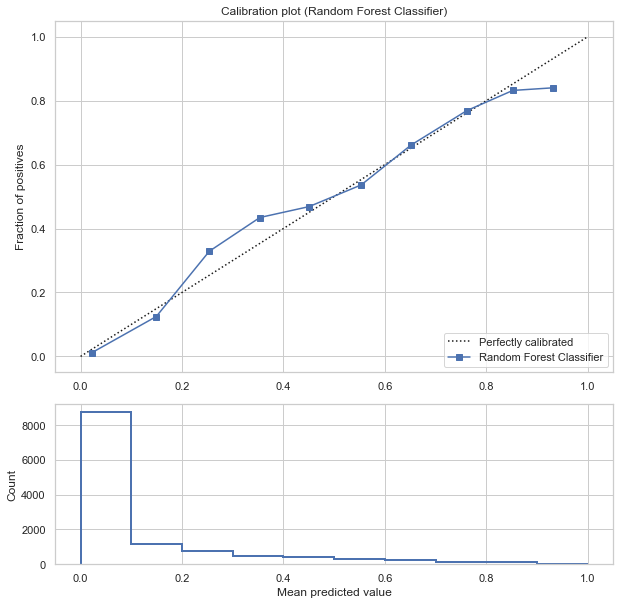

In [92]:
# Plot calibration curve for Random Forest
plot_calibration_curve("Random Forest Classifier", 1, y_test, rf_predict_proba[:,1])

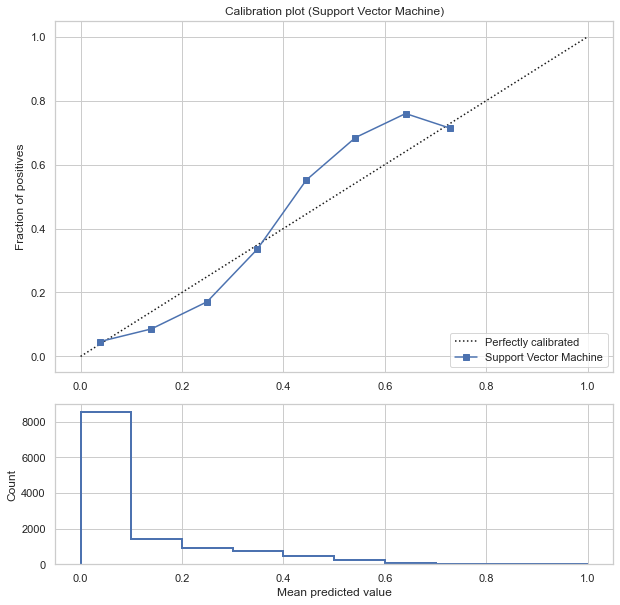

In [93]:
# Plot calibration curve for SVM
plot_calibration_curve("Support Vector Machine", 1, y_test, svm_predict_proba[:,1])

We have obtained a good fit in the reliability diagrams for the LR and RF imbalanced models.

The SVM model is fairly calibrated, is under-confident when it predicts that the sample doesn't belong to the positive class and overconfident otherwise. We need to calibrate it.

It will be a fine practice to check the reliability diagram in the SVM SMOTE balanced model. We'll check the results in the following plot:

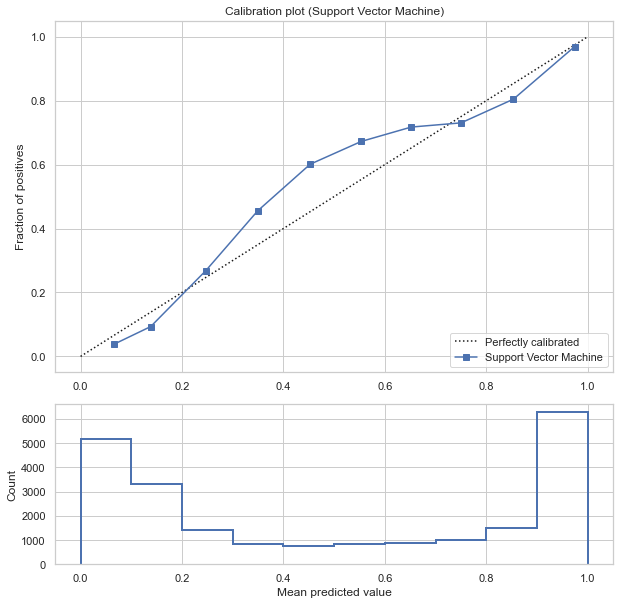

In [94]:
# Plot calibration curve for SVM
plot_calibration_curve("Support Vector Machine", 1, y_test_r, svm_predict_proba_res[:,1])

As you can see in the last example, the dataset is more balanced for the SVM SMOTE model, but we'll try to calibrate it in addition with the SVM imbalanced model in the next section.

### 5.2. Calibrating the model

The two most popular methods of calibrating a machine learning model are the isotonic and Platt's method.

Scikit-learn provides a base estimator for calibrating models through the CalibratedClassifierCV class. 

For this case, we will use the Platt's method, which is equivalent to setting the method argument in the constructor of the class to sigmoid. 

#### 5.2.1. Platt Scaling

##### 5.2.1.1. Imbalanced SVM

3318.125

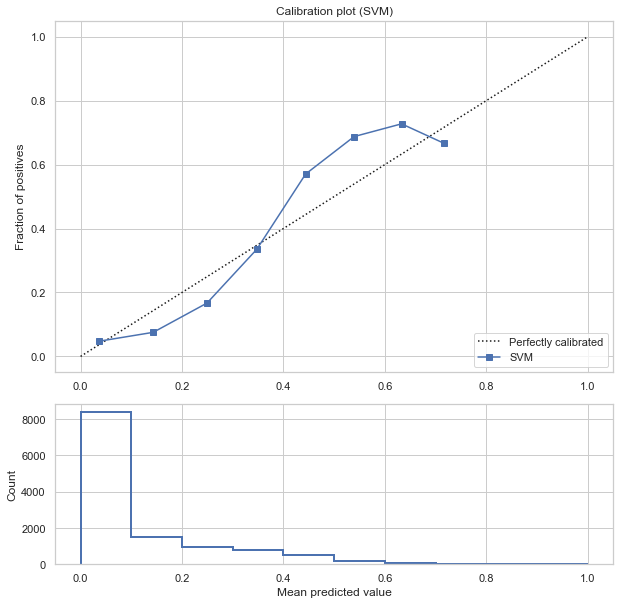

In [95]:
platts_scaling = CalibratedClassifierCV(base_estimator=svm_model, cv=5, method='sigmoid')
platts_scaling.fit(X_train, y_train)

calibrated_probs = platts_scaling.predict_proba(X_test)[:,1]

plot_calibration_curve("SVM", 3, y_test, calibrated_probs)
time.process_time()

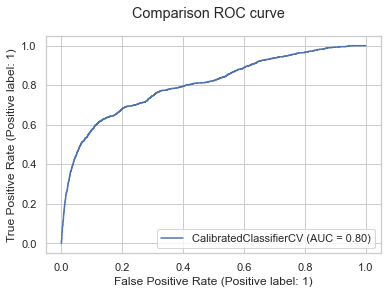

In [96]:
svm_cal_plot = plot_roc_curve(platts_scaling, X_test, y_test)
svm_cal_plot.figure_.suptitle("Comparison ROC curve")
plt.show()

##### 5.2.1.2. SMOTE SVM

7329.859375

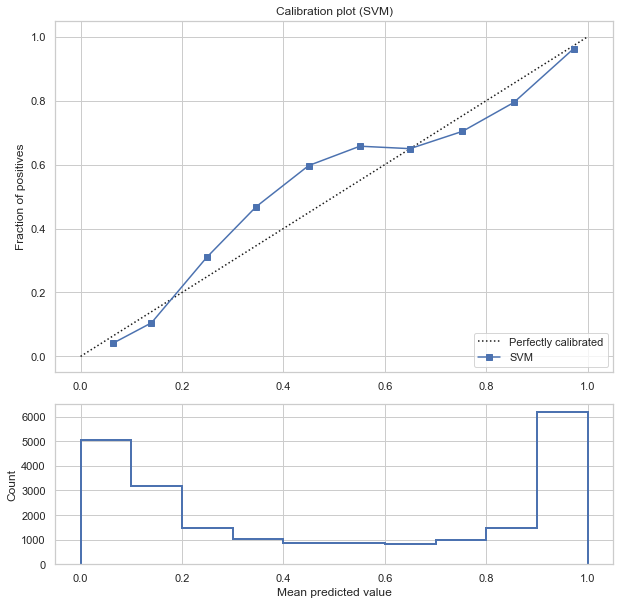

In [97]:
platts_scaling_smote = CalibratedClassifierCV(base_estimator=svm_model_res, cv=5, method='sigmoid')
platts_scaling_smote.fit(X_train_r, y_train_r)

calibrated_probs_smote = platts_scaling_smote.predict_proba(X_test_r)[:,1]

plot_calibration_curve("SVM", 3, y_test_r, calibrated_probs_smote)
time.process_time()

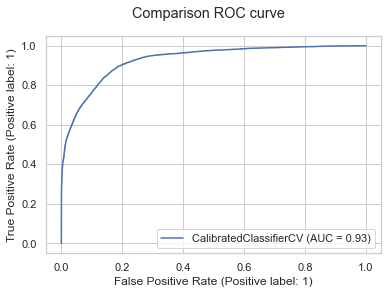

In [98]:
svm_cal_plot_smote = plot_roc_curve(platts_scaling_smote, X_test_r, y_test_r)
svm_cal_plot_smote.figure_.suptitle("Comparison ROC curve")
plt.show()

#### 5.2.2. Isotonic Regression

##### 5.2.1.1. Imbalanced SVM

8759.453125

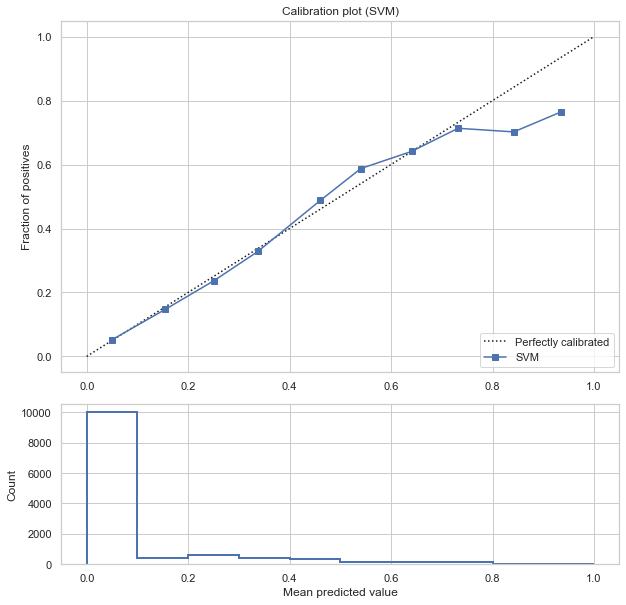

In [99]:
iso_regression = CalibratedClassifierCV(base_estimator=svm_model, cv=5, method='isotonic')
iso_regression.fit(X_train, y_train)

calibrated_probs_iso = iso_regression.predict_proba(X_test)[:,1]

plot_calibration_curve("SVM", 3, y_test, calibrated_probs_iso)
time.process_time()

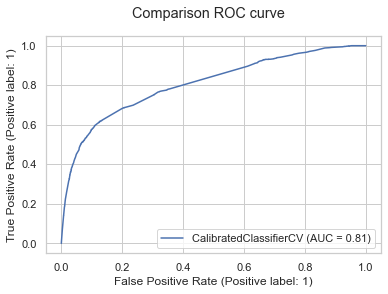

In [100]:
svm_cal_plot_iso = plot_roc_curve(iso_regression, X_test, y_test)
svm_cal_plot_iso.figure_.suptitle("Comparison ROC curve")
plt.show()

##### 5.2.2.2. SMOTE SVM

12763.890625

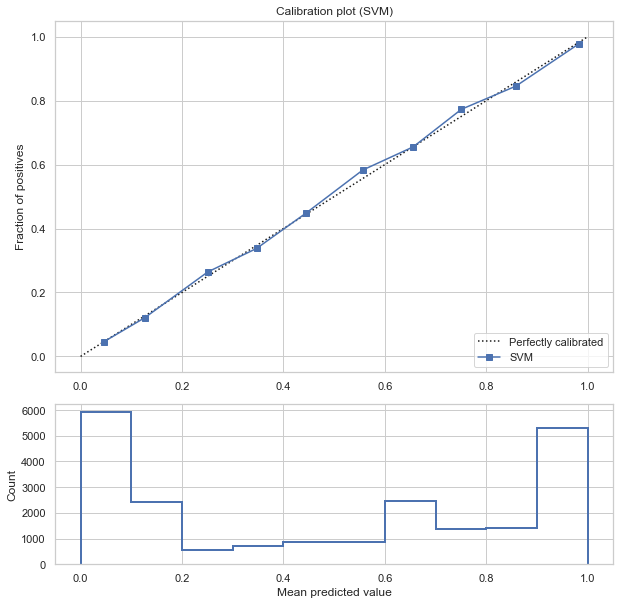

In [101]:
iso_regression_smote = CalibratedClassifierCV(base_estimator=svm_model_res, cv=5, method='isotonic')
iso_regression_smote.fit(X_train_r, y_train_r)

calibrated_probs_iso_smote = iso_regression_smote.predict_proba(X_test_r)[:,1]

plot_calibration_curve("SVM", 3, y_test_r, calibrated_probs_iso_smote)
time.process_time()

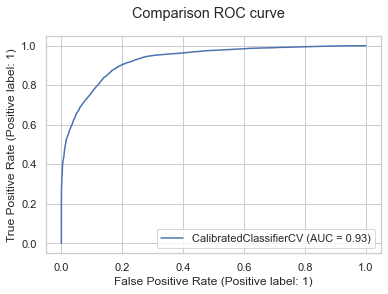

In [102]:
svm_cal_plot_iso_smote = plot_roc_curve(iso_regression_smote, X_test_r, y_test_r)
svm_cal_plot_iso_smote.figure_.suptitle("Comparison ROC curve")
plt.show()

The SMOTE SVM with isotonic calibration has a best ROC AUC score.

## 6. Selecting the best prediction model

To select the best model not only the best scores are needed, besides that we have to analyze if the model is reliable (if not, calibrate it) and then we can see what features are important in order to establish the best Bank campaign to attract clients for term deposit suscription.

Remember the following definitions:

    - Precision: Percentage of correct predictions of a class among all predictions for that class.
    - Recall: Proportion of correct predictions of a class and the total number of occurrences of that class.
    - F-score: A single metric combination of precision and recall.
    - Confusion matrix: A tabular summary of True/False Positive/Negative prediction rates.
    - ROC curve: A binary classification diagnostic plot.

In this step we'll compare all the obtained scores:

In [110]:
classes = ['LR', 'RF', 'SVM', 'LRsmote', 'RFsmote', 'SVMsmote', 'SVMplatt', 'SVMiso', 'SVMsmoplatt', 'SVMsmoiso']

results = [{'ROC AUC': 0.81 , 'Accuracy': 0.9, 'Precision': 0.71, 'Recall': 0.25, 'F1 Score': 0.37}, 
           {'ROC AUC': 0.93, 'Accuracy': 0.9, 'Precision': 0.65, 'Recall': 0.36, 'F1 Score': 0.47},
           {'ROC AUC': 0.8, 'Accuracy': 0.77, 'Precision': 0.28, 'Recall': 0.69, 'F1 Score': 0.4},
           {'ROC AUC': 0.96, 'Accuracy': 0.9, 'Precision': 0.93, 'Recall': 0.86, 'F1 Score': 0.89},
           {'ROC AUC': 0.99, 'Accuracy': 0.95, 'Precision': 0.94, 'Recall': 0.93, 'F1 Score': 0.95},
           {'ROC AUC': 0.94, 'Accuracy': 0.85, 'Precision': 0.89, 'Recall': 0.79, 'F1 Score': 0.84},
           {'ROC AUC': 0.80, 'Accuracy': '', 'Precision': '', 'Recall': '', 'F1 Score': ''},
           {'ROC AUC': 0.81, 'Accuracy': '', 'Precision': '', 'Recall': '', 'F1 Score': ''},
           {'ROC AUC': 0.93, 'Accuracy': '', 'Precision': '', 'Recall': '', 'F1 Score': ''},
           {'ROC AUC': 0.93, 'Accuracy': '', 'Precision': '', 'Recall': '', 'F1 Score': ''},
          ]
    
results_df = pd.DataFrame(results, index=classes)
results_df

,ROC AUC,Accuracy,Precision,Recall,F1 Score
LR,0.81,0.9,0.71,0.25,0.37
RF,0.93,0.9,0.65,0.36,0.47
SVM,0.80,0.77,0.28,0.69,0.4
LRsmote,0.96,0.9,0.93,0.86,0.89
RFsmote,0.99,0.95,0.94,0.93,0.95
SVMsmote,0.94,0.85,0.89,0.79,0.84
SVMplatt,0.80,,,,
SVMiso,0.81,,,,
SVMsmoplatt,0.93,,,,
SVMsmoiso,0.93,,,,


The best scores were obtained in the Random Forest SMOTE balanced model, followed by the LR SMOTE and then the SVM SMOTE models .

## 7. Feature Importance

In [104]:
features_names = X.columns.tolist()
features_names_resampled = X_resampled.columns.tolist()

### 7.1. Random Forest SMOTE features importance

In [105]:
# For RF
importances = rf_res.feature_importances_
feature_names = [f"feature {i}" for i in range(X_resampled.shape[1])]
indices = np.argsort(importances)
std = np.std([tree.feature_importances_ for tree in rf_res.estimators_], axis=0)

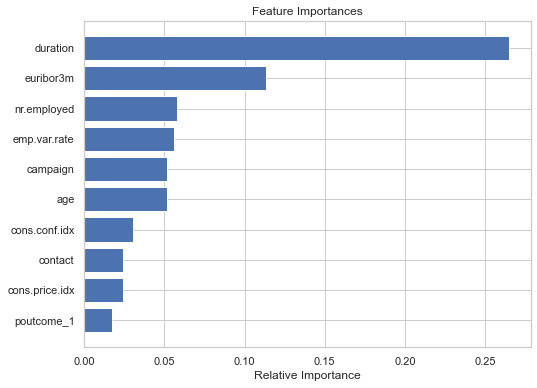

In [106]:
# Feature importance based on mean decrease in impurity (MDI for RF)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False)
#print(forest_importances.head(10))

# customized number 
num_features = 10 

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features_names[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()


### 7.2. LR SMOTE features importance

In [107]:
# Function for LR and SVM
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    # Show all features
    if top == -1:
        top = len(names)
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

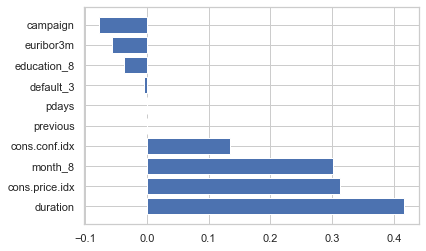

In [108]:
# Feature importances for LR Smote model
f_importances(log_reg_res.coef_[0], features_names_resampled, top=10)

### 7.3. SVM SMOTE features importance

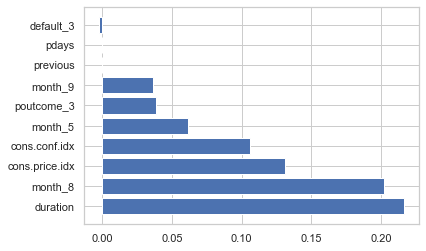

In [109]:
# Feature importances for SVM Smote model
f_importances(svm_model_res.coef_[0], features_names_resampled, top=10)

## 8. Conclusions

Based in the plot showed in 7.1. and taking in mind the previous Exploratory Data Analysis, we could conclude that:

    - The main TOP 10 features for treatment are 'duration', 'euribor3m', 'nr.employed', 'age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'contact', 'poutcome_1'.
    - As we saw in the EDA analysis, we establish a duration of 25 minutes as maximum per call and not more than 5 calls per client to obtain a suscription.
    - The age of potential suscribers is in the range of 28-38 years old.
    - The months with succesed subscriptions are may, jun, jul, aug, and nov (pre Christmas season).
    - Another features to analize are the social and economic indicators such as 'euribor3m', 'nr.employed', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', and 'poutcome_1'.

In addition to these conclusions, we recommend continue ehe analysis extending the study into another prediction models for binary classifications. This could be part for further investigations.